### **Introduction**

This analysis focuses on customer and marketing data for a men’s fashion retailer, aiming to provide strategic insights into customer behavior, channel performance, and demographic differences. The goal of this analysis is to help the retailer optimize its marketing efforts, improve customer retention, and maximize profitability.

#### **Key Objectives:**
1. **Data Preparation & Cleaning**: Ensure the data is structured, clean, and ready for analysis. This includes handling missing values, ensuring proper data types, and loading data from multiple sources.
2. **Channel Performance Analysis**: Evaluate the performance of various marketing channels (e.g., Paid Search, Organic Search, Affiliates) to identify which channels provide the best return on investment (ROI) and customer lifetime value (CLV).
3. **Demographic Differences Analysis**: Analyze how customer demographics (age, location, and contact preferences) influence profitability and customer behavior, identifying key segments for targeted marketing efforts.
4. **Customer Behavior Analysis**: Assess customer purchasing behavior, including subsequent orders and the impact of promotions, and identify churn risks to improve customer retention.
5. **Recommendations**: Based on the analysis, provide actionable recommendations on how the retailer can optimize marketing spend, target key demographics, and enhance customer retention strategies.

This notebook is structured to first prepare and clean the data, followed by exploring key areas of performance and customer segmentation. Finally, actionable insights will be summarized to guide future marketing and customer retention strategies.


### **Step 1: Data Preparation & Cleaning**

#### **Tasks**:
1. **Understand the structure**: Review the sheets and columns in each DataFrame.
   - **Definitions**: Reference terms and their meanings.
   - **Cost**: Monthly marketing spend across different channels.
   - **Value_Info**: Customer purchase behavior (profits, orders).
   - **Demographic_Info**: Demographic details (age, location, acquisition source).
   
2. **Check for missing data**:
   - Handle missing values, if any, across all DataFrames.
   - Use `df.isnull().sum()` to identify missing values.
   - Decide how to handle missing data: Drop, fill with averages, or flag them.

3. **Convert data types**:
   - Ensure that numeric columns (e.g., profit, counts) are appropriately typed.
   - Convert date columns to datetime format where necessary.

#### **Deliverables**:
- **Cleaned DataFrames** ready for analysis.


In [9]:
import os
import pandas as pd
# Print the current working directory
print(os.getcwd())

/home/cian/2K-Tech-Assessment/src


In [10]:
print(os.listdir())

['Analysis.ipynb']


In [11]:
file_path = "../data/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx"

xls = pd.ExcelFile(file_path)

# Print out all the sheet names
print(xls.sheet_names)

['Definitions', 'Cost', 'Value Info', 'Demographic Info']


In [12]:
sheet_names = xls.sheet_names

# Load each sheet into a different DataFrame
Definitions = pd.read_excel(file_path, sheet_name = sheet_names[0])
Cost = pd.read_excel(file_path, sheet_name = sheet_names[1])
Value_Info = pd.read_excel(file_path, sheet_name = sheet_names[2])
Demographic_Info = pd.read_excel(file_path, sheet_name = sheet_names[3])



In [13]:
# Refactor for displaying data info and checking missing values in a loop
dataframes = [Definitions, Cost, Value_Info, Demographic_Info]
df_names = ['Definitions', 'Cost', 'Value_Info', 'Demographic_Info']

for df, name in zip(dataframes, df_names):
    print(f"\n{name} DataFrame")
    print(df.head())
    print(df.info())
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())


Definitions DataFrame
                     Definitions  \
0               1st Order Profit   
1        Subsequent Order Profit   
2              Subsequent Orders   
3  Total value of all promotions   
4                            NaN   

                                          Unnamed: 1  
0  Total profit made on first order from a custom...  
1  Total profit made on all subsequent orders fro...  
2  Total number of orders subsequent to the 1st o...  
3  The total loss of the promotional discounts th...  
4                                                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Definitions  10 non-null     object
 1   Unnamed: 1   9 non-null      object
dtypes: object(2)
memory usage: 308.0+ bytes
None

Missing values in Definitions:
Definitions    1
Unnamed: 1     2
dtype: int64

Cost DataFrame
       Month  Paid 

In [14]:
# Check for missing values in each DataFrame
print("Missing values in Definitions:")
print(Definitions.isnull().sum())

print("\nMissing values in Cost:")
print(Cost.isnull().sum())

print("\nMissing values in Value_Info:")
print(Value_Info.isnull().sum())

print("\nMissing values in Demographic_Info:")
print(Demographic_Info.isnull().sum())


Missing values in Definitions:
Definitions    1
Unnamed: 1     2
dtype: int64

Missing values in Cost:
Month          0
Paid Search    0
Affiliates     0
dtype: int64

Missing values in Value_Info:
Customer ID                      0
1st Order Profit                 0
Subsequent Order Profit          0
Subsequent Orders Count          0
Total value of all promotions    0
dtype: int64

Missing values in Demographic_Info:
Customer ID              0
Title                 4078
Date Of Birth            0
Address City             0
Contact Allowed          0
Registration Date        0
Source of Customer       0
dtype: int64


In [15]:
# Convert date columns to datetime format in Demographic_Info
Demographic_Info['Date Of Birth'] = pd.to_datetime(Demographic_Info['Date Of Birth'], errors='coerce')
Demographic_Info['Registration Date'] = pd.to_datetime(Demographic_Info['Registration Date'], errors='coerce')

# Verify the conversions
print(Demographic_Info.dtypes)


Customer ID                    int64
Title                         object
Date Of Birth         datetime64[ns]
Address City                  object
Contact Allowed               object
Registration Date     datetime64[ns]
Source of Customer            object
dtype: object


In [16]:
print(len(Demographic_Info))

31441


In [17]:
# Check the data types of Value_Info to ensure numeric columns are properly typed
print(Value_Info.dtypes)


Customer ID                        int64
1st Order Profit                 float64
Subsequent Order Profit          float64
Subsequent Orders Count            int64
Total value of all promotions    float64
dtype: object


In [18]:
# Drop the 'Title' column from Demographic_Info due to the missing values
Demographic_Info = Demographic_Info.drop(columns=['Title'])

# Verify the change
print(Demographic_Info.head())

   Customer ID Date Of Birth Address City Contact Allowed   Registration Date  \
0            1    1973-06-29     Malahide               Y 2013-01-01 00:23:00   
1            2    1984-07-25       Dublin               Y 2013-01-01 00:30:00   
2            3    1991-05-01       Dublin               Y 2013-01-01 01:09:00   
3            4    1986-11-30       Dublin               N 2013-01-01 01:19:00   
4            5    1991-10-02     Limerick               Y 2013-01-01 01:58:00   

  Source of Customer  
0     Organic Search  
1         Affiliates  
2        Paid Social  
3         Affiliates  
4        Paid Search  


### **Step 2: Channel Performance Analysis**

#### **Objective**:
Identify which marketing channels drive the most value and provide the best return on investment (ROI).

#### **Tasks**:
1. **Summarize total and average spend** for each marketing channel from the `Cost` DataFrame.
   - Group by channel and calculate total marketing spend.

2. **Compare marketing spend to customer acquisition** in `Demographic_Info`.
   - Join customer acquisition channels from `Demographic_Info` with marketing spend from `Cost` to assess ROI.

3. **Calculate key metrics**:
   - **Cost per acquisition (CPA)** by dividing spend by the number of customers acquired per channel.
   - **Profit per channel** by aggregating the `1st Order Profit` and `Subsequent Order Profit` by `Source of Customer`.

4. **Plot key metrics**:
   - Plot spend vs profit by channel to see which channels provide the highest ROI.


In [19]:
Cost

,Month,Paid Search,Affiliates
0,2013-01-01,41512.00,16421
1,2013-02-01,61243.00,42101
2,2013-03-01,84597.88,141321


In [20]:
# Summarize total marketing spend per channel
total_spend = Cost[['Paid Search', 'Affiliates']].sum()

# Calculate average spend per month for each channel
average_spend = Cost[['Paid Search', 'Affiliates']].mean()

# Display the results
print("Total Spend by Channel:")
print(total_spend)

print("\nAverage Spend per Month by Channel:")
print(average_spend)

Total Spend by Channel:
Paid Search    187352.88
Affiliates     199843.00
dtype: float64

Average Spend per Month by Channel:
Paid Search    62450.960000
Affiliates     66614.333333
dtype: float64


In [21]:
# Group by 'Source of Customer' to count the number of customers acquired via each channel
customer_acquisition = Demographic_Info['Source of Customer'].value_counts()

# Display the results
print("Customer Acquisition by Channel:")
print(customer_acquisition)


Customer Acquisition by Channel:
Source of Customer
Direct            11252
Organic Search     8392
Paid Search        6518
Affiliates         3868
Paid Social        1411
Name: count, dtype: int64


In [22]:
# Merge Demographic_Info and Value_Info on 'Customer ID' to associate customers with their profits
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Calculate total profit (1st Order Profit + Subsequent Order Profit) for each customer
merged_data['Total Profit'] = merged_data['1st Order Profit'] + merged_data['Subsequent Order Profit']

# Group by 'Source of Customer' to get total profit per channel
profit_per_channel = merged_data.groupby('Source of Customer')['Total Profit'].sum()

# Calculate CPA (Cost per Acquisition)
# First match the channel names to ensure consistency between Cost and Demographic_Info
cost_per_channel = pd.Series([total_spend['Paid Search'], total_spend['Affiliates']], index=['Paid Search', 'Affiliates'])

# Calculate CPA by dividing total spend by number of customers acquired per channel
cpa_per_channel = cost_per_channel / customer_acquisition

# Display the results
print("Total Profit by Channel:")
print(profit_per_channel)

print("\nCost per Acquisition (CPA) by Channel:")
print(cpa_per_channel)


Total Profit by Channel:
Source of Customer
Affiliates        138310.352264
Direct            534625.999680
Organic Search    407498.059650
Paid Search       305940.955560
Paid Social        85690.836192
Name: Total Profit, dtype: float64

Cost per Acquisition (CPA) by Channel:
Affiliates        51.665719
Direct                  NaN
Organic Search          NaN
Paid Search       28.743921
Paid Social             NaN
dtype: float64


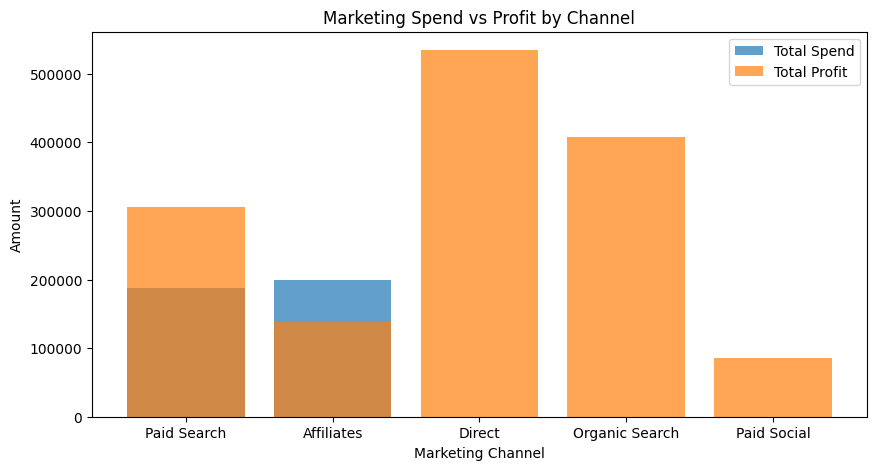

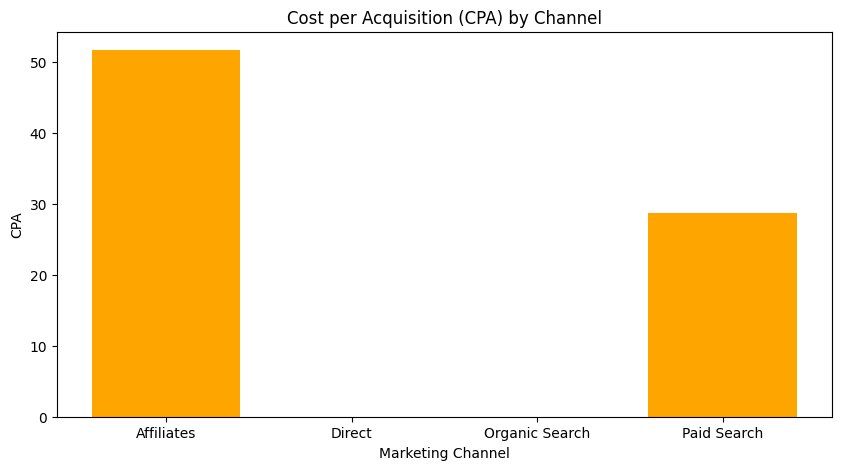

In [23]:
import matplotlib.pyplot as plt

# Plot marketing spend vs profit by channel
plt.figure(figsize=(10, 5))
plt.bar(cost_per_channel.index, total_spend, label='Total Spend', alpha=0.7)
plt.bar(profit_per_channel.index, profit_per_channel, label='Total Profit', alpha=0.7)
plt.title("Marketing Spend vs Profit by Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Plot CPA by channel
plt.figure(figsize=(10, 5))
plt.bar(cpa_per_channel.index, cpa_per_channel, color='orange')
plt.title("Cost per Acquisition (CPA) by Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("CPA")
plt.show()


### **Step 3: Demographic Differences Analysis**

#### **Objective**:
Understand how customer demographics influence profitability, purchasing behavior, and channel performance.

#### **Tasks**:
1. **Segment customers by age groups** (using `Date of Birth` from `Demographic_Info`) and analyze their:
   - Average `1st Order Profit`.
   - Average `Subsequent Orders Count`.
   - Channel of acquisition (`Source of Customer`).

2. **Analyze geographic patterns**:
   - Group customers by `City` and see if certain locations are more profitable or have higher customer acquisition rates.

3. **Contact Preferences**:
   - Evaluate differences in profitability between customers who allowed contact vs. those who didn’t.


In [24]:
# Create an 'Age' column by calculating the difference between the current date and Date of Birth
from datetime import datetime

# Calculate age from Date of Birth
current_year = datetime.now().year
Demographic_Info['Age'] = current_year - Demographic_Info['Date Of Birth'].dt.year

# Define age groups (you can adjust the bins as needed)
bins = [18, 25, 35, 45, 55, 65, 100]  # Example age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
Demographic_Info['Age Group'] = pd.cut(Demographic_Info['Age'], bins=bins, labels=labels)

# Merge Demographic_Info and Value_Info to link age and profitability data
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Group by Age Group to calculate average 1st Order Profit and Subsequent Orders Count
age_group_profit = merged_data.groupby('Age Group').agg({
    '1st Order Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

# Display the results
print("Average Profit and Subsequent Orders by Age Group:")
print(age_group_profit)

# Analyze acquisition channel by age group
age_group_channel = merged_data.groupby(['Age Group', 'Source of Customer']).size().unstack()

print("\nCustomer Acquisition by Channel and Age Group:")
print(age_group_channel)


Average Profit and Subsequent Orders by Age Group:
           1st Order Profit  Subsequent Orders Count
Age Group                                           
18-25                   NaN                      NaN
26-35              9.165768                 4.135493
36-45              9.718833                 4.066567
46-55             11.496207                 4.021914
56-65             13.595367                 3.988393
65+               12.582368                 4.023350

Customer Acquisition by Channel and Age Group:
Source of Customer  Affiliates  Direct  Organic Search  Paid Search  \
Age Group                                                             
18-25                        0       0               0            0   
26-35                      567    1537            1209          773   
36-45                     1526    5005            3719         2683   
46-55                      904    2735            1859         1621   
56-65                      484    1103             

/tmp/ipykernel_274725/3105530737.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_profit = merged_data.groupby('Age Group').agg({
/tmp/ipykernel_274725/3105530737.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_channel = merged_data.groupby(['Age Group', 'Source of Customer']).size().unstack()


In [25]:
# Merge Demographic_Info and Value_Info to link city and profitability data
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Create Total Profit column by summing 1st Order Profit and Subsequent Order Profit
merged_data['Total Profit'] = merged_data['1st Order Profit'] + merged_data['Subsequent Order Profit']

# Now, proceed with the geographic analysis by city


In [26]:
# Group by City to calculate total and average profit for each city
city_profit = merged_data.groupby('Address City').agg({
    'Total Profit': ['sum', 'mean'],  # Sum of total profit and average profit per customer
    'Customer ID': 'count'  # Total customers in each city
})

# Sort cities by total profit for analysis
city_profit.columns = ['Total Profit', 'Average Profit per Customer', 'Customer Count']
city_profit = city_profit.sort_values(by='Total Profit', ascending=False)

# Display the results
print("Profitability by City:")
print(city_profit.head(10))  # Display top 10 cities by profit


Profitability by City:
              Total Profit  Average Profit per Customer  Customer Count
Address City                                                           
Dublin        1.015310e+06                    47.982498           21160
Cork          5.379036e+04                    51.326678            1048
Galway        2.947283e+04                    46.195660             638
Limerick      2.894300e+04                    46.909230             617
Waterford     1.805357e+04                    47.384701             381
Kilkenny      1.330647e+04                    50.594933             263
Dundalk       1.205703e+04                    50.029183             241
Wexford       1.187609e+04                    49.278394             241
Mullingar     1.163404e+04                    48.882535             238
Tallaght      1.068597e+04                    46.060204             232


In [27]:
# Group by Contact Allowed to calculate average profit and subsequent orders
contact_preference_profit = merged_data.groupby('Contact Allowed').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

# Display the results
print("Profit and Subsequent Orders by Contact Preference:")
print(contact_preference_profit)


Profit and Subsequent Orders by Contact Preference:
                 Total Profit  Subsequent Orders Count
Contact Allowed                                       
N                   39.599089                 3.216797
Y                   54.370761                 4.668178


### **Step 4: Customer Behavior Analysis**

#### **Objective**:
Evaluate customer purchasing behavior to identify opportunities for increasing customer lifetime value (CLV).

#### **Tasks**:

1. **Customer segmentation**:
   - Analyze how customers behave post-acquisition:
     - Compare average `Subsequent Orders Count` across different channels.
     - Compare `Subsequent Order Profit` and `1st Order Profit` to determine customer lifetime value by channel.

2. **Promotional impact**:
   - Analyze the impact of promotions by reviewing `Total value of all promotions` in relation to `Subsequent Orders Count` and profitability.

3. **Churn risk analysis**:
   - Identify any patterns in customers who only make a `1st Order` and no subsequent orders, which could indicate churn.
   - Plot time between first and subsequent orders to evaluate the customer retention rate.


In [28]:
# Calculate average Subsequent Orders Count by channel
subsequent_orders_by_channel = merged_data.groupby('Source of Customer')['Subsequent Orders Count'].mean()

# Compare 1st Order Profit and Subsequent Order Profit by channel
profit_by_channel = merged_data.groupby('Source of Customer').agg({
    '1st Order Profit': 'mean',
    'Subsequent Order Profit': 'mean'
})

# Display the results
print("Average Subsequent Orders Count by Channel:")
print(subsequent_orders_by_channel)

print("\nAverage 1st Order Profit and Subsequent Order Profit by Channel:")
print(profit_by_channel)


Average Subsequent Orders Count by Channel:
Source of Customer
Affiliates        4.203674
Direct            4.027694
Organic Search    4.083660
Paid Search       3.919578
Paid Social       4.301599
Name: Subsequent Orders Count, dtype: float64

Average 1st Order Profit and Subsequent Order Profit by Channel:
                    1st Order Profit  Subsequent Order Profit
Source of Customer                                           
Affiliates                  7.925100                28.898742
Direct                     10.793229                38.071226
Organic Search             11.086243                38.827777
Paid Search                10.918521                37.230827
Paid Social                13.829113                48.446204


In [29]:
# Analyze how promotions impact Subsequent Orders Count and Total Profit
promotion_impact = merged_data.groupby('Total value of all promotions').agg({
    'Subsequent Orders Count': 'mean',
    'Total Profit': 'mean'
})

# Display the results
print("Promotional Impact on Subsequent Orders and Profit:")
print(promotion_impact)


Promotional Impact on Subsequent Orders and Profit:
                               Subsequent Orders Count  Total Profit
Total value of all promotions                                       
-0.049922                                          0.0      12.48000
-0.048879                                          0.0      18.23472
-0.048758                                          0.0      13.82400
-0.048637                                          2.0      27.23688
-0.047506                                          7.0     105.82560
...                                                ...           ...
 112.588116                                       22.0     339.17400
 123.915766                                        8.0     141.56928
 126.994463                                       13.0     171.49440
 137.402979                                       14.0     377.56800
 145.264732                                       10.0     120.49884

[21318 rows x 2 columns]


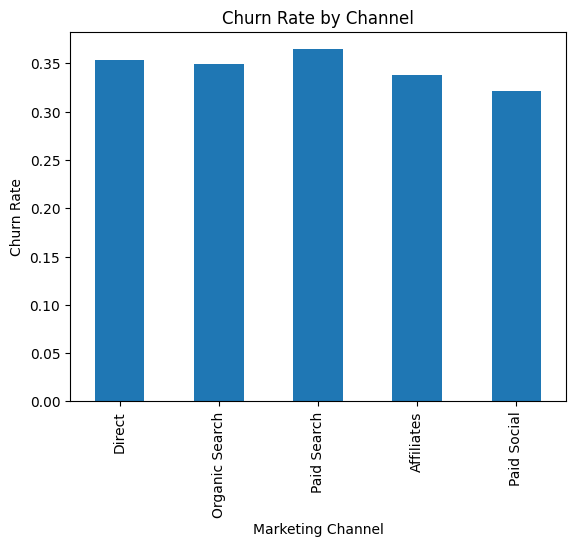

In [30]:
import matplotlib.pyplot as plt

# Identify churned customers (Subsequent Orders Count = 0)
churned_customers = merged_data[merged_data['Subsequent Orders Count'] == 0]

# Calculate churn rate by marketing channel
churn_rate_by_channel = churned_customers['Source of Customer'].value_counts() / merged_data['Source of Customer'].value_counts()

# Plot churn rate by channel
churn_rate_by_channel.plot(kind='bar', title='Churn Rate by Channel')
plt.xlabel("Marketing Channel")
plt.ylabel("Churn Rate")
plt.show()

# Plot time between 1st and subsequent orders
# Assume we have a 'First Order Date' and 'Subsequent Order Date' column
# merged_data['Order Time Difference'] = (merged_data['Subsequent Order Date'] - merged_data['First Order Date']).dt.days

# Plot a histogram of time differences
# plt.hist(merged_data['Order Time Difference'].dropna(), bins=30)
# plt.title("Time Between 1st and Subsequent Orders")
# plt.xlabel("Days")
# plt.ylabel("Frequency")
# plt.show()


### **Step 5: Recommendations and Conclusion**

#### **Objective**:
Summarize the findings and provide actionable recommendations based on the analysis.

#### **Tasks**:
1. **Compile key insights** from channel performance, demographic differences, and customer behavior.
   
2. **Make strategic recommendations** on:
   - Which channels the operator should invest more in (based on ROI and customer quality).
   - Which demographics to target with marketing efforts.
   - How to improve customer retention and maximize profitability.

#### **Deliverables**:
- A clear summary of insights and actionable recommendations for the operator to focus on.


In [31]:
# Channel performance summary (CPA, Total Profit, Customer Acquisition)
channel_performance_summary = pd.DataFrame({
    'Total Spend': total_spend,
    'Customer Acquisition': customer_acquisition,
    'Total Profit': profit_per_channel,
    'CPA': cpa_per_channel
})

# Display the channel performance summary
print("Channel Performance Summary:")
print(channel_performance_summary)


Channel Performance Summary:
                Total Spend  Customer Acquisition   Total Profit        CPA
Affiliates        199843.00                  3868  138310.352264  51.665719
Direct                  NaN                 11252  534625.999680        NaN
Organic Search          NaN                  8392  407498.059650        NaN
Paid Search       187352.88                  6518  305940.955560  28.743921
Paid Social             NaN                  1411   85690.836192        NaN


In [32]:
# Demographic insights (age groups, geographic patterns, contact preferences)
age_group_summary = merged_data.groupby('Age Group').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

city_summary = merged_data.groupby('Address City').agg({
    'Total Profit': 'sum',
    'Customer ID': 'count'
})

contact_preference_summary = merged_data.groupby('Contact Allowed').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

# Display demographic summaries
print("Age Group Profitability Summary:")
print(age_group_summary)

print("\nCity Profitability Summary (Top Cities):")
print(city_summary.sort_values(by='Total Profit', ascending=False).head(10))

print("\nContact Preference Summary:")
print(contact_preference_summary)


Age Group Profitability Summary:
           Total Profit  Subsequent Orders Count
Age Group                                       
18-25               NaN                      NaN
26-35         41.540358                 4.135493
36-45         44.319686                 4.066567
46-55         51.515705                 4.021914
56-65         59.736447                 3.988393
65+           56.100865                 4.023350

City Profitability Summary (Top Cities):
              Total Profit  Customer ID
Address City                           
Dublin        1.015310e+06        21160
Cork          5.379036e+04         1048
Galway        2.947283e+04          638
Limerick      2.894300e+04          617
Waterford     1.805357e+04          381
Kilkenny      1.330647e+04          263
Dundalk       1.205703e+04          241
Wexford       1.187609e+04          241
Mullingar     1.163404e+04          238
Tallaght      1.068597e+04          232

Contact Preference Summary:
                 Total P

/tmp/ipykernel_274725/3685368680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = merged_data.groupby('Age Group').agg({


In [33]:
# CLV and churn summary
clv_summary = merged_data.groupby('Source of Customer')['Total Profit'].mean()
churn_summary = churn_rate_by_channel

# Display CLV and churn summaries
print("Customer Lifetime Value (CLV) by Channel:")
print(clv_summary)

print("\nChurn Rate by Channel:")
print(churn_summary)


Customer Lifetime Value (CLV) by Channel:
Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64

Churn Rate by Channel:
Source of Customer
Direct            0.353258
Organic Search    0.349216
Paid Search       0.364337
Affiliates        0.337593
Paid Social       0.321221
Name: count, dtype: float64


In [34]:
# Recommendation for channel investment based on CPA and CLV
investment_recommendation = channel_performance_summary[
    (channel_performance_summary['CPA'] < channel_performance_summary['CPA'].mean()) & 
    (clv_summary > clv_summary.mean())
]

print("\nRecommended Channels to Invest More In:")
print(investment_recommendation)



Recommended Channels to Invest More In:
Empty DataFrame
Columns: [Total Spend, Customer Acquisition, Total Profit, CPA]
Index: []


In [35]:
# Recommendations for demographic targeting based on profitability
age_recommendation = age_group_summary[age_group_summary['Total Profit'] > age_group_summary['Total Profit'].mean()]
city_recommendation = city_summary[city_summary['Total Profit'] > city_summary['Total Profit'].mean()]

print("\nRecommended Age Groups to Target:")
print(age_recommendation)

print("\nRecommended Cities to Target:")
print(city_recommendation.sort_values(by='Total Profit', ascending=False).head(5))



Recommended Age Groups to Target:
           Total Profit  Subsequent Orders Count
Age Group                                       
46-55         51.515705                 4.021914
56-65         59.736447                 3.988393
65+           56.100865                 4.023350

Recommended Cities to Target:
              Total Profit  Customer ID
Address City                           
Dublin        1.015310e+06        21160
Cork          5.379036e+04         1048
Galway        2.947283e+04          638


In [36]:
# Recommendations for improving customer retention
print("\nRecommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)")
print(contact_preference_summary)

print("\nRecommendation: Target Promotions to High CLV Channels and Customers")
# Assume promotions data is available from previous analysis
print(promotion_impact.sort_values(by='Total Profit', ascending=False))



Recommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)
                 Total Profit  Subsequent Orders Count
Contact Allowed                                       
N                   39.599089                 3.216797
Y                   54.370761                 4.668178

Recommendation: Target Promotions to High CLV Channels and Customers
                               Subsequent Orders Count  Total Profit
Total value of all promotions                                       
29.934739                                         19.0     415.83168
37.744211                                         19.0     401.30000
65.632490                                         24.0     386.17920
8.444622                                          16.0     377.95200
137.402979                                        14.0     377.56800
...                                                ...           ...
0.342405                                           0.0       0.98000
0.019621 